In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy as sc

### Key Variables, Data Obtention & Preprocessing

In [2]:
data = yf.download("TSLA BRBY.L BMW.DE TM JPM HSBA.L UBS MUFG ^GSPC ^FTSE ^GDAXI ^N225 BTC-USD ETH-USD ^VIX", period='1d', start='2018-1-1', end='2023-12-31') # Date frequency for our dataset

[*********************100%%**********************]  15 of 15 completed


In [3]:
# Inspect the data
data.head()  # View the first few rows

Adj Close                                                     \
               BMW.DE       BRBY.L       BTC-USD     ETH-USD      HSBA.L   
Date                                                                       
2018-01-01        NaN          NaN  13657.200195  772.640991         NaN   
2018-01-02  62.279926  1560.359375  14982.099609  884.443970  558.889160   
2018-01-03  62.611500  1566.047607  15201.000000  962.719971  557.647400   
2018-01-04  63.058426  1534.542969  15599.200195  980.921997  559.619629   
2018-01-05  63.793671  1559.921997  17429.500000  997.719971  557.720398   

                                                               ...  \
                  JPM  MUFG          TM       TSLA        UBS  ...   
Date                                                           ...   
2018-01-01        NaN   NaN         NaN        NaN        NaN  ...   
2018-01-02  90.125511  7.35  128.369995  21.368668  15.272319  ...   
2018-01-03  90.217346  7.41  130.130005  21.150000  15.511723  ...   
2018-01-04  91.509750  7.58  132.160004  20.974667  15.643808  ...   
2018-01-05  90.922302  7.64  133.860001  21.105333  15.511723  ...   

                Volume                                               \
                   JPM       MUFG        TM         TSLA        UBS   
Date                                                                  
2018-01-01         NaN        NaN       NaN          NaN        NaN   
2018-01-02  13578800.0   745500.0   83500.0   65283000.0  1312400.0   
2018-01-03  11901000.0  1272500.0  162200.0   67822500.0  2617200.0   
2018-01-04  12953700.0  1553500.0  161800.0  149194500.0  2432900.0   
2018-01-05  14155000.0  1608500.0  135300.0   68868000.0  2137700.0   

                                                                      
                  ^FTSE       ^GDAXI         ^GSPC        ^N225 ^VIX  
Date                                                                  
2018-01-01          NaN          NaN           NaN          NaN  NaN  
2018-01-02  576251800.0   86049300.0  3.397430e+09          NaN  0.0  
2018-01-03  571662800.0   84809300.0  3.544030e+09          NaN  0.0  
2018-01-04  705864000.0  101199400.0  3.697340e+09  102200000.0  0.0  
2018-01-05  636035700.0  112555000.0  3.239280e+09  101900000.0  0.0  

[5 rows x 90 columns]

Here we will only select the Adj. Close for is the value we're interested in for cleaning our data.

In [4]:
# Example of manipulation: Extracting close prices for all stocks
Data = data['Adj Close']
Data.head()  # View the first few rows of close prices

,BMW.DE,BRBY.L,BTC-USD,ETH-USD,HSBA.L,JPM,MUFG,TM,TSLA,UBS,^FTSE,^GDAXI,^GSPC,^N225,^VIX
Date,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,13657.200195,772.640991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,62.279926,1560.359375,14982.099609,884.443970,558.889160,90.125511,7.35,128.369995,21.368668,15.272319,7648.100098,12871.389648,2695.810059,NaN,9.77
2018-01-03,62.611500,1566.047607,15201.000000,962.719971,557.647400,90.217346,7.41,130.130005,21.150000,15.511723,7671.100098,12978.209961,2713.060059,NaN,9.15
2018-01-04,63.058426,1534.542969,15599.200195,980.921997,559.619629,91.509750,7.58,132.160004,20.974667,15.643808,7695.899902,13167.889648,2723.989990,23506.330078,9.22
2018-01-05,63.793671,1559.921997,17429.500000,997.719971,557.720398,90.922302,7.64,133.860001,21.105333,15.511723,7724.200195,13319.639648,2743.149902,23714.529297,9.22


In [5]:
# Saving the dataset we will work with
Data.to_csv('Data.csv')

In [6]:
Data

,BMW.DE,BRBY.L,BTC-USD,ETH-USD,HSBA.L,JPM,MUFG,TM,TSLA,UBS,^FTSE,^GDAXI,^GSPC,^N225,^VIX
Date,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,13657.200195,772.640991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,62.279926,1560.359375,14982.099609,884.443970,558.889160,90.125511,7.35,128.369995,21.368668,15.272319,7648.100098,12871.389648,2695.810059,NaN,9.77
2018-01-03,62.611500,1566.047607,15201.000000,962.719971,557.647400,90.217346,7.41,130.130005,21.150000,15.511723,7671.100098,12978.209961,2713.060059,NaN,9.15
2018-01-04,63.058426,1534.542969,15599.200195,980.921997,559.619629,91.509750,7.58,132.160004,20.974667,15.643808,7695.899902,13167.889648,2723.989990,23506.330078,9.22
2018-01-05,63.793671,1559.921997,17429.500000,997.719971,557.720398,90.922302,7.64,133.860001,21.105333,15.511723,7724.200195,13319.639648,2743.149902,23714.529297,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,NaN,NaN,42520.402344,2231.465332,NaN,167.358017,8.52,179.850006,256.609985,31.040001,NaN,NaN,4774.750000,33305.851562,12.99
2023-12-27,100.400002,1422.500000,43442.855469,2378.739990,631.500000,168.361816,8.50,180.720001,261.440002,31.190001,7725.000000,16742.070312,4781.580078,33681.238281,12.43
2023-12-28,100.440002,1411.500000,42627.855469,2347.566162,631.599976,169.256317,8.58,181.110001,253.179993,30.910000,7722.700195,16701.550781,4783.350098,33539.621094,12.47


In [7]:
# Descriptive data analysis for the EDA in our model

Data.describe()

,BMW.DE,BRBY.L,BTC-USD,ETH-USD,HSBA.L,JPM,MUFG,TM,TSLA,UBS,^FTSE,^GDAXI,^GSPC,^N225,^VIX
count,1519.000000,1514.000000,2190.000000,2190.000000,1514.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1513.000000,1523.000000,1509.000000,1464.000000,1509.000000
mean,67.383906,1746.248594,21748.786414,1254.719335,464.969175,116.062885,5.696037,146.121816,145.981504,14.774248,7147.360808,13587.317331,3587.896514,25603.836068,20.581471
std,16.485277,281.267985,16007.270649,1125.576761,91.818144,23.670086,1.168751,21.991397,113.530192,4.522433,537.564958,1663.337689,691.533312,3834.114518,7.998521
min,29.859787,991.862976,3236.761719,84.308296,241.686859,70.046432,3.420000,108.500000,11.931333,6.659527,4993.899902,8441.709961,2237.399902,16552.830078,9.150000
25%,55.071939,1550.414490,8321.193604,228.616425,384.664879,94.112236,4.940000,129.070007,22.271334,10.853649,7000.899902,12346.544922,2888.320068,22256.610352,15.100000
50%,64.828621,1728.750427,17004.559570,1080.143127,485.107071,112.726509,5.470000,139.619995,160.190002,14.397257,7277.700195,13253.740234,3677.949951,26172.615234,18.889999
75%,75.929672,1918.005371,32123.124023,1870.742615,528.144409,138.611145,6.310000,161.330002,242.190002,17.130278,7513.399902,15244.794922,4204.310059,28451.452148,23.930000
max,112.900002,2554.343750,67566.828125,4812.087402,648.148682,169.256317,8.980000,211.369995,409.970001,31.190001,8014.299805,16794.429688,4796.560059,33753.328125,82.690002


### More Data Preprocessing
We're still on the stages of data preprocessing

In [8]:
Data.dtypes

BMW.DE     float64
BRBY.L     float64
BTC-USD    float64
ETH-USD    float64
HSBA.L     float64
JPM        float64
MUFG       float64
TM         float64
TSLA       float64
UBS        float64
^FTSE      float64
^GDAXI     float64
^GSPC      float64
^N225      float64
^VIX       float64
dtype: object

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190 entries, 2018-01-01 to 2023-12-30
Freq: D
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BMW.DE   1519 non-null   float64
 1   BRBY.L   1514 non-null   float64
 2   BTC-USD  2190 non-null   float64
 3   ETH-USD  2190 non-null   float64
 4   HSBA.L   1514 non-null   float64
 5   JPM      1509 non-null   float64
 6   MUFG     1509 non-null   float64
 7   TM       1509 non-null   float64
 8   TSLA     1509 non-null   float64
 9   UBS      1509 non-null   float64
 10  ^FTSE    1513 non-null   float64
 11  ^GDAXI   1523 non-null   float64
 12  ^GSPC    1509 non-null   float64
 13  ^N225    1464 non-null   float64
 14  ^VIX     1509 non-null   float64
dtypes: float64(15)
memory usage: 273.8 KB


In the late output we can observe that we have several missing values, this can affect our data, and the results of the analysis, reason why further cleaning & data preprocessing is necessary

In [10]:
### For furthering the data cleaning and preprocessing process, let's drop rows with any NaN values
data = data.dropna()

In [11]:
data =data['Adj Close']

In [12]:
# See how we have made the datapoints even by eliminating the null values in the respective rows
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1372 entries, 2018-01-04 to 2023-12-29
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BMW.DE   1372 non-null   float64
 1   BRBY.L   1372 non-null   float64
 2   BTC-USD  1372 non-null   float64
 3   ETH-USD  1372 non-null   float64
 4   HSBA.L   1372 non-null   float64
 5   JPM      1372 non-null   float64
 6   MUFG     1372 non-null   float64
 7   TM       1372 non-null   float64
 8   TSLA     1372 non-null   float64
 9   UBS      1372 non-null   float64
 10  ^FTSE    1372 non-null   float64
 11  ^GDAXI   1372 non-null   float64
 12  ^GSPC    1372 non-null   float64
 13  ^N225    1372 non-null   float64
 14  ^VIX     1372 non-null   float64
dtypes: float64(15)
memory usage: 171.5 KB


### EDA of variables

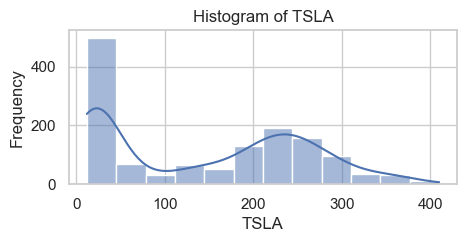

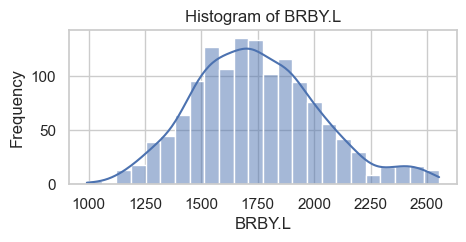

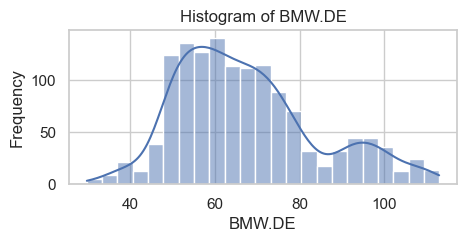

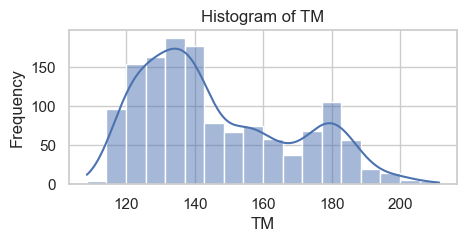

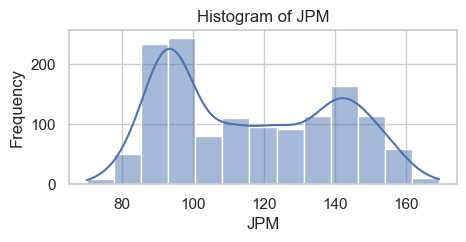

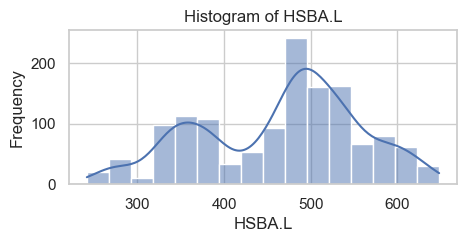

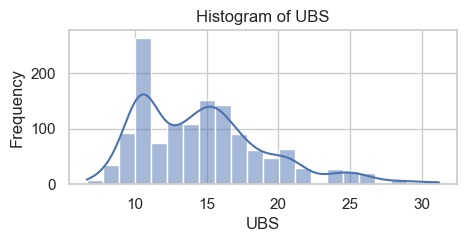

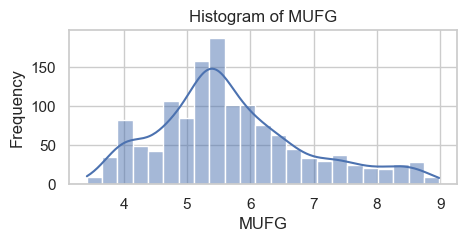

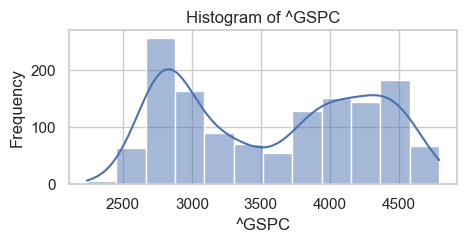

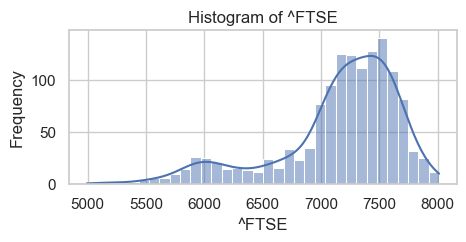

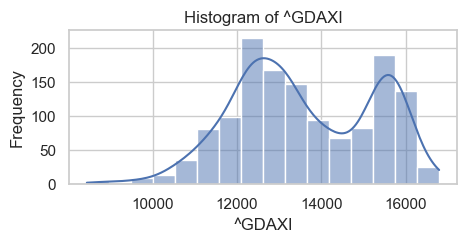

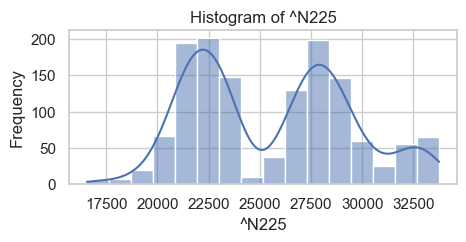

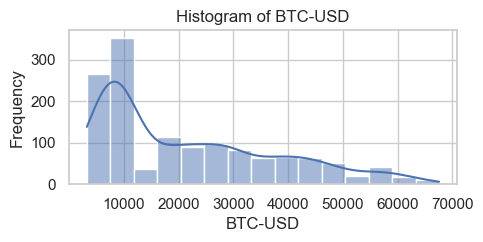

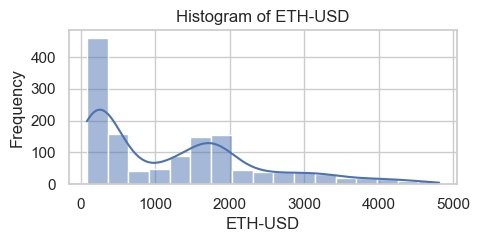

In [13]:

# Set the style for seaborn
sns.set(style="whitegrid")

# List of columns you want to plot histograms for
data_hist = ['TSLA', 'BRBY.L', 'BMW.DE', 'TM', 'JPM', 'HSBA.L', 'UBS', 'MUFG', '^GSPC', '^FTSE', '^GDAXI', '^N225', 'BTC-USD', 'ETH-USD']  

# Plotting histograms for selected columns
for column in data_hist:
    if column in data.columns:
        plt.figure(figsize=(5, 2))
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column {column} not found in DataFrame.")


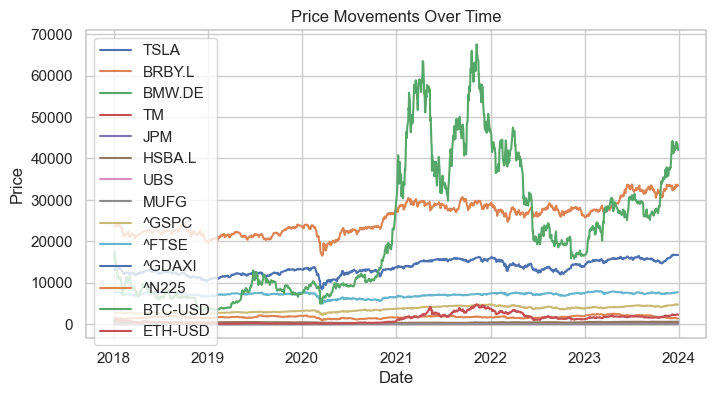

In [14]:
# Plotting price movements
plt.figure(figsize=(8, 4))
for column in data_hist:
    if column in data.columns:
        plt.plot(data.index, data[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


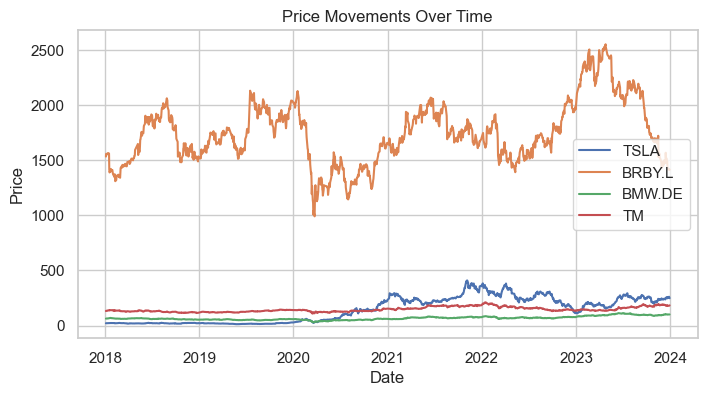

In [15]:
# Plot the Stocks
data_stocks = ['TSLA', 'BRBY.L', 'BMW.DE', 'TM']

plt.figure(figsize=(8, 4))
for column in data_stocks:
    if column in data.columns:
        plt.plot(data.index, data[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

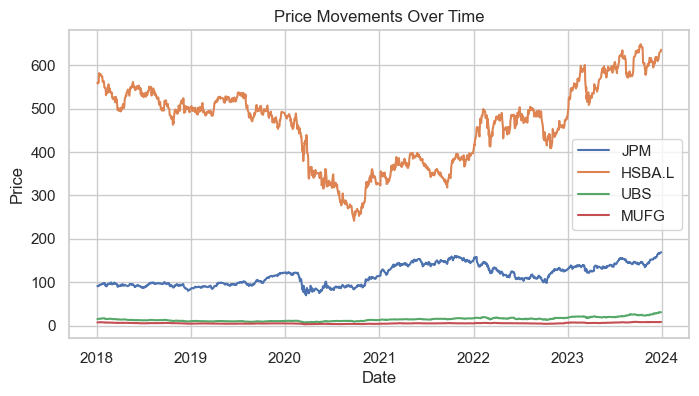

In [16]:
# Plot the Finance Industry
data_fin = ['JPM', 'HSBA.L', 'UBS', 'MUFG']

plt.figure(figsize=(8, 4))
for column in data_fin:
    if column in data.columns:
        plt.plot(data.index, data[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

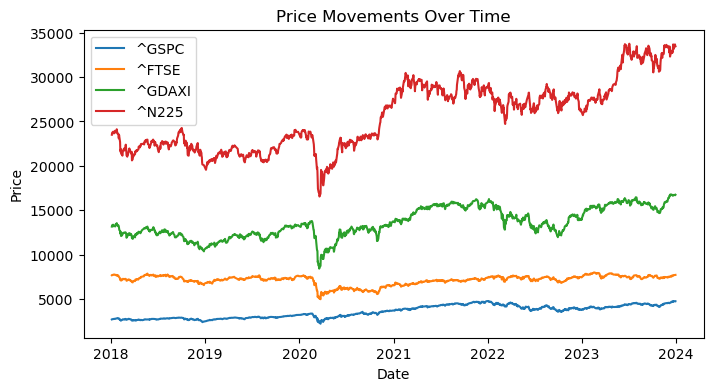

In [14]:
# Plot the indexes
data_index = ['^GSPC', '^FTSE', '^GDAXI', '^N225']

plt.figure(figsize=(8, 4))
for column in data_index:
    if column in data.columns:
        plt.plot(data.index, data[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

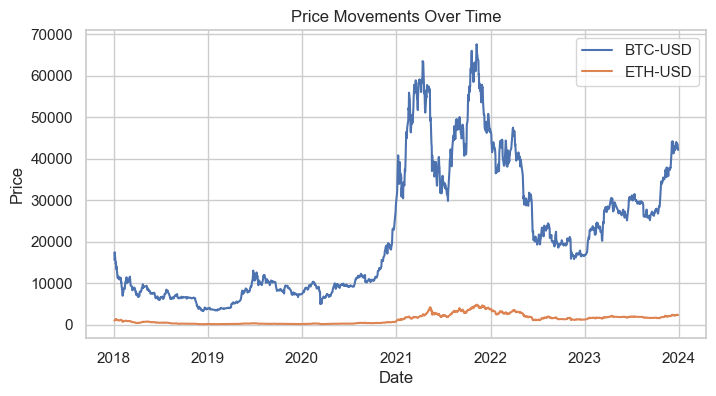

In [18]:
# Plot the Cryptocurrencies
data_crypto = ['BTC-USD', 'ETH-USD']

plt.figure(figsize=(8, 4))
for column in data_crypto:
    if column in data.columns:
        plt.plot(data.index, data[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Portfolios Selection

In [16]:
# List of tickers for the group of stocks you are interested in each portfolio type

Amer = ['TSLA', 'JPM', '^GSPC', 'BTC-USD', '^VIX']
Brit = ['BRBY.L', 'HSBA.L', '^FTSE', 'BTC-USD']
Euro = ['BMW.DE', 'UBS', '^GDAXI', 'ETH-USD']
Asia = ['TM', 'MUFG', '^N225', 'ETH-USD']

# Extracting data for selected Portfolios

# Here, we'll extract the closing prices for simplicity
Amer_data = data[Amer]
Brit_data = data[Brit]
Euro_data = data[Euro]
Asia_data = data[Asia]

Amer_data.head()  # View the first few rows of the selected portfolio


,TSLA,JPM,^GSPC,BTC-USD,^VIX
Date,,,,,
2018-01-04,20.974667,91.509750,2723.989990,15599.200195,9.22
2018-01-05,21.105333,90.922302,2743.149902,17429.500000,9.22
2018-01-09,22.246000,91.518166,2751.290039,14595.400391,10.08
2018-01-10,22.320000,92.525253,2748.229980,14973.299805,9.82
2018-01-11,22.530001,93.020378,2767.560059,13405.799805,9.88


In [17]:
Brit_data.head()  # View the first few rows of the selected portfolio

,BRBY.L,HSBA.L,^FTSE,BTC-USD
Date,,,,
2018-01-04,1534.542969,559.619629,7695.899902,15599.200195
2018-01-05,1559.921997,557.720398,7724.200195,17429.500000
2018-01-09,1555.108643,559.765747,7731.000000,14595.400391
2018-01-10,1557.296509,581.095764,7748.500000,14973.299805
2018-01-11,1557.296509,581.460938,7762.899902,13405.799805


In [18]:
Euro_data.head()  # View the first few rows of the selected portfolio

,BMW.DE,UBS,^GDAXI,ETH-USD
Date,,,,
2018-01-04,63.058426,15.643808,13167.889648,980.921997
2018-01-05,63.793671,15.511723,13319.639648,997.719971
2018-01-09,65.019089,15.627298,13385.589844,1299.739990
2018-01-10,64.442429,15.701594,13281.339844,1255.819946
2018-01-11,63.930626,15.932745,13202.900391,1154.930054


In [19]:
Asia_data.head()  # View the first few rows of the selected portfolio

,TM,MUFG,^N225,ETH-USD
Date,,,,
2018-01-04,132.160004,7.58,23506.330078,980.921997
2018-01-05,133.860001,7.64,23714.529297,997.719971
2018-01-09,133.720001,7.68,23849.990234,1299.739990
2018-01-10,136.399994,7.83,23788.199219,1255.819946
2018-01-11,136.910004,7.94,23710.429688,1154.930054


### Calculation of the asset's daily returns

In [20]:
# Example: Calculating daily returns
Am_daily_returns = Amer_data.pct_change()
Br_daily_returns = Brit_data.pct_change()
Eu_daily_returns = Euro_data.pct_change()
As_daily_returns = Asia_data.pct_change()

Am_daily_returns.head()  # View the first few rows of daily returns

,TSLA,JPM,^GSPC,BTC-USD,^VIX
Date,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.006230,-0.006420,0.007034,0.117333,0.000000
2018-01-09,0.054046,0.006554,0.002967,-0.162604,0.093275
2018-01-10,0.003326,0.011004,-0.001112,0.025892,-0.025794
2018-01-11,0.009409,0.005351,0.007034,-0.104686,0.006110


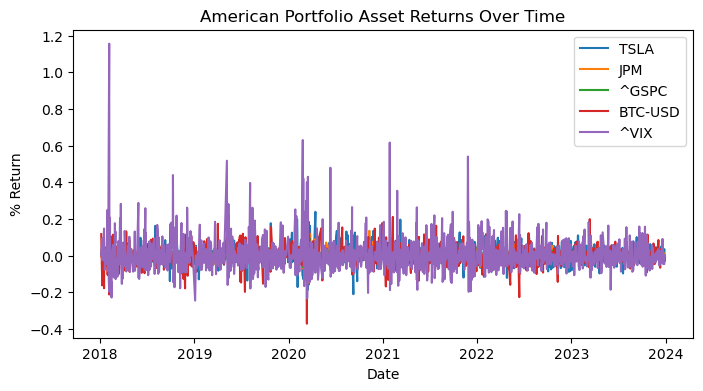

In [21]:
Amdr = Am_daily_returns

plt.figure(figsize=(8, 4))
for column in Amdr:
    if column in Amdr.columns:
        plt.plot(Amdr.index, Amdr[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('American Portfolio Asset Returns Over Time')
plt.xlabel('Date')
plt.ylabel('% Return')
plt.legend()
plt.show()

In [22]:
Br_daily_returns.head()  # View the first few rows of daily returns

,BRBY.L,HSBA.L,^FTSE,BTC-USD
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.016538,-0.003394,0.003677,0.117333
2018-01-09,-0.003086,0.003667,0.000880,-0.162604
2018-01-10,0.001407,0.038105,0.002264,0.025892
2018-01-11,0.000000,0.000628,0.001858,-0.104686


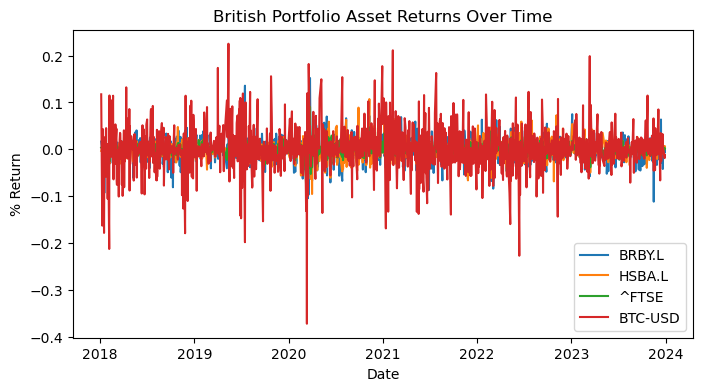

In [23]:
Brdr = Br_daily_returns

plt.figure(figsize=(8, 4))
for column in Brdr:
    if column in Brdr.columns:
        plt.plot(Brdr.index, Brdr[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('British Portfolio Asset Returns Over Time')
plt.xlabel('Date')
plt.ylabel('% Return')
plt.legend()
plt.show()

In [24]:
Eu_daily_returns.head()  # View the first few rows of daily returns

,BMW.DE,UBS,^GDAXI,ETH-USD
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.011660,-0.008443,0.011524,0.017125
2018-01-09,0.019209,0.007451,0.004951,0.302710
2018-01-10,-0.008869,0.004754,-0.007788,-0.033791
2018-01-11,-0.007942,0.014721,-0.005906,-0.080338


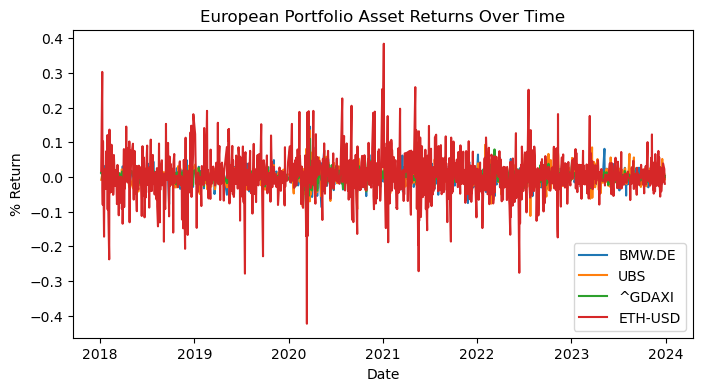

In [25]:
Eudr = Eu_daily_returns

plt.figure(figsize=(8, 4))
for column in Eudr:
    if column in Eudr.columns:
        plt.plot(Eudr.index, Eudr[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('European Portfolio Asset Returns Over Time')
plt.xlabel('Date')
plt.ylabel('% Return')
plt.legend()
plt.show()

In [26]:
As_daily_returns.head()  # View the first few rows of daily returns

,TM,MUFG,^N225,ETH-USD
Date,,,,
2018-01-04,NaN,NaN,NaN,NaN
2018-01-05,0.012863,0.007916,0.008857,0.017125
2018-01-09,-0.001046,0.005236,0.005712,0.302710
2018-01-10,0.020042,0.019531,-0.002591,-0.033791
2018-01-11,0.003739,0.014049,-0.003269,-0.080338


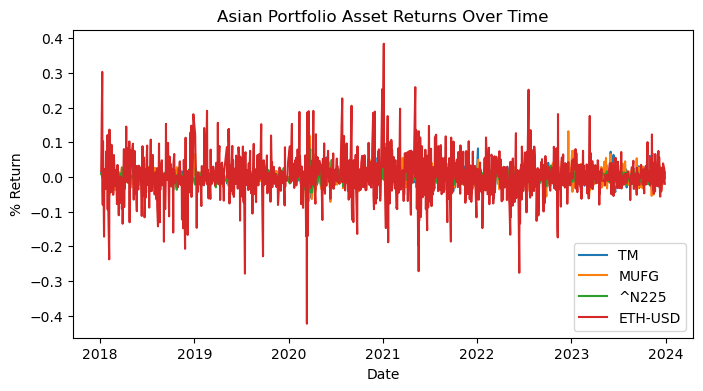

In [27]:
Asdr = As_daily_returns

plt.figure(figsize=(8, 4))
for column in Asdr:
    if column in Asdr.columns:
        plt.plot(Asdr.index, Asdr[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Asian Portfolio Asset Returns Over Time')
plt.xlabel('Date')
plt.ylabel('% Return')
plt.legend()
plt.show()

### Calculating Portfolio's Returns

In [28]:
# Portfolio return calculation

Ampw = {'TSLA': 0.25, 'JPM': 0.25, '^GSPC': 0.25, 'BTC-USD': 0.25}
Brpw = {'BRBY.L': 0.25, 'HSBA.L': 0.25, '^FTSE': 0.25, 'BTC-USD': 0.25}
Eupw = {'BMW.DE': 0.25, 'UBS': 0.25, '^GDAXI': 0.25, 'ETH-USD': 0.25}
Aspw = {'TM': 0.25, 'MUFG': 0.25, '^N225': 0.25, 'ETH-USD': 0.25}

# Calculate portfolio return
Ampr = (Am_daily_returns * pd.Series(Ampw)).sum(axis=1)
Brpr = (Br_daily_returns * pd.Series(Brpw)).sum(axis=1)
Eupr = (Eu_daily_returns * pd.Series(Eupw)).sum(axis=1)
Aspr = (As_daily_returns * pd.Series(Aspw)).sum(axis=1)

# Adding portfolio return to the DataFrame
Amdr['Portfolio_Return'] = Ampr
Brdr['Portfolio_Return'] = Brpr
Eudr['Portfolio_Return'] = Eupr
Asdr['Portfolio_Return'] = Aspr


In [29]:
Amdr

,TSLA,JPM,^GSPC,BTC-USD,^VIX,Portfolio_Return
Date,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN,0.000000
2018-01-05,0.006230,-0.006420,0.007034,0.117333,0.000000,0.031044
2018-01-09,0.054046,0.006554,0.002967,-0.162604,0.093275,-0.024759
2018-01-10,0.003326,0.011004,-0.001112,0.025892,-0.025794,0.009778
2018-01-11,0.009409,0.005351,0.007034,-0.104686,0.006110,-0.020723
...,...,...,...,...,...,...
2023-12-21,0.029781,0.005704,0.010301,0.004969,-0.001463,0.012689
2023-12-22,-0.007701,-0.000597,0.001660,0.002935,-0.045421,-0.000926
2023-12-27,0.035242,0.011947,0.005668,-0.012615,-0.046048,0.010061


In [30]:
Brdr

,BRBY.L,HSBA.L,^FTSE,BTC-USD,Portfolio_Return
Date,,,,,
2018-01-04,NaN,NaN,NaN,NaN,0.000000
2018-01-05,0.016538,-0.003394,0.003677,0.117333,0.033539
2018-01-09,-0.003086,0.003667,0.000880,-0.162604,-0.040285
2018-01-10,0.001407,0.038105,0.002264,0.025892,0.016917
2018-01-11,0.000000,0.000628,0.001858,-0.104686,-0.025550
...,...,...,...,...,...
2023-12-21,-0.041904,0.005005,-0.002722,0.004969,-0.008663
2023-12-22,-0.005948,0.008514,0.000364,0.002935,0.001466
2023-12-27,0.001408,0.005894,0.003573,-0.012615,-0.000435


In [31]:
Eudr

,BMW.DE,UBS,^GDAXI,ETH-USD,Portfolio_Return
Date,,,,,
2018-01-04,NaN,NaN,NaN,NaN,0.000000
2018-01-05,0.011660,-0.008443,0.011524,0.017125,0.007966
2018-01-09,0.019209,0.007451,0.004951,0.302710,0.083580
2018-01-10,-0.008869,0.004754,-0.007788,-0.033791,-0.011424
2018-01-11,-0.007942,0.014721,-0.005906,-0.080338,-0.019866
...,...,...,...,...,...
2023-12-21,-0.008664,0.011210,-0.002727,0.017090,0.004227
2023-12-22,0.010949,0.007173,0.001124,0.038839,0.014521
2023-12-27,-0.002385,0.009712,0.002148,0.022443,0.007980


In [32]:
Asdr

,TM,MUFG,^N225,ETH-USD,Portfolio_Return
Date,,,,,
2018-01-04,NaN,NaN,NaN,NaN,0.000000
2018-01-05,0.012863,0.007916,0.008857,0.017125,0.011690
2018-01-09,-0.001046,0.005236,0.005712,0.302710,0.078153
2018-01-10,0.020042,0.019531,-0.002591,-0.033791,0.000798
2018-01-11,0.003739,0.014049,-0.003269,-0.080338,-0.016455
...,...,...,...,...,...
2023-12-21,0.005113,0.019536,-0.015901,0.017090,0.006460
2023-12-22,-0.012883,0.025150,0.000862,0.038839,0.012992
2023-12-27,0.012267,-0.007009,0.015442,0.022443,0.010786


### Cumulative Returns

In [33]:
Cum_Ampr = (1 + Ampr).cumprod() - 1
Cum_Brpr = (1 + Brpr).cumprod() - 1
Cum_Eupr = (1 + Eupr).cumprod() - 1
Cum_Aspr = (1 + Aspr).cumprod() - 1

In [34]:
Amdr['Cumulative_Return'] = Cum_Ampr
Brdr['Cumulative_Return'] = Cum_Brpr
Eudr['Cumulative_Return'] = Cum_Eupr
Asdr['Cumulative_Return'] = Cum_Aspr

In [35]:
Amdr

,TSLA,JPM,^GSPC,BTC-USD,^VIX,Portfolio_Return,Cumulative_Return
Date,,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-01-05,0.006230,-0.006420,0.007034,0.117333,0.000000,0.031044,0.031044
2018-01-09,0.054046,0.006554,0.002967,-0.162604,0.093275,-0.024759,0.005517
2018-01-10,0.003326,0.011004,-0.001112,0.025892,-0.025794,0.009778,0.015348
2018-01-11,0.009409,0.005351,0.007034,-0.104686,0.006110,-0.020723,-0.005693
...,...,...,...,...,...,...,...
2023-12-21,0.029781,0.005704,0.010301,0.004969,-0.001463,0.012689,4.079833
2023-12-22,-0.007701,-0.000597,0.001660,0.002935,-0.045421,-0.000926,4.075130
2023-12-27,0.035242,0.011947,0.005668,-0.012615,-0.046048,0.010061,4.126189


In [36]:
Brdr

,BRBY.L,HSBA.L,^FTSE,BTC-USD,Portfolio_Return,Cumulative_Return
Date,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-01-05,0.016538,-0.003394,0.003677,0.117333,0.033539,0.033539
2018-01-09,-0.003086,0.003667,0.000880,-0.162604,-0.040285,-0.008098
2018-01-10,0.001407,0.038105,0.002264,0.025892,0.016917,0.008682
2018-01-11,0.000000,0.000628,0.001858,-0.104686,-0.025550,-0.017090
...,...,...,...,...,...,...
2023-12-21,-0.041904,0.005005,-0.002722,0.004969,-0.008663,0.829364
2023-12-22,-0.005948,0.008514,0.000364,0.002935,0.001466,0.832046
2023-12-27,0.001408,0.005894,0.003573,-0.012615,-0.000435,0.831248


In [37]:
Eudr

,BMW.DE,UBS,^GDAXI,ETH-USD,Portfolio_Return,Cumulative_Return
Date,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-01-05,0.011660,-0.008443,0.011524,0.017125,0.007966,0.007966
2018-01-09,0.019209,0.007451,0.004951,0.302710,0.083580,0.092213
2018-01-10,-0.008869,0.004754,-0.007788,-0.033791,-0.011424,0.079736
2018-01-11,-0.007942,0.014721,-0.005906,-0.080338,-0.019866,0.058285
...,...,...,...,...,...,...
2023-12-21,-0.008664,0.011210,-0.002727,0.017090,0.004227,1.801331
2023-12-22,0.010949,0.007173,0.001124,0.038839,0.014521,1.842011
2023-12-27,-0.002385,0.009712,0.002148,0.022443,0.007980,1.864689


In [38]:
Asdr

,TM,MUFG,^N225,ETH-USD,Portfolio_Return,Cumulative_Return
Date,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,0.000000,0.000000
2018-01-05,0.012863,0.007916,0.008857,0.017125,0.011690,0.011690
2018-01-09,-0.001046,0.005236,0.005712,0.302710,0.078153,0.090757
2018-01-10,0.020042,0.019531,-0.002591,-0.033791,0.000798,0.091627
2018-01-11,0.003739,0.014049,-0.003269,-0.080338,-0.016455,0.073664
...,...,...,...,...,...,...
2023-12-21,0.005113,0.019536,-0.015901,0.017090,0.006460,1.447870
2023-12-22,-0.012883,0.025150,0.000862,0.038839,0.012992,1.479673
2023-12-27,0.012267,-0.007009,0.015442,0.022443,0.010786,1.506418


In [39]:

Amcr = Amdr[['Cumulative_Return']]
Brcr = Brdr[['Cumulative_Return']]
Eucr = Eudr[['Cumulative_Return']]
Ascr = Asdr[['Cumulative_Return']]

Cum_Rets = pd.concat([Amcr, Brcr, Eucr, Ascr], axis=1)

Cum_Rets

,Cumulative_Return,Cumulative_Return,Cumulative_Return,Cumulative_Return
Date,,,,
2018-01-04,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.031044,0.033539,0.007966,0.011690
2018-01-09,0.005517,-0.008098,0.092213,0.090757
2018-01-10,0.015348,0.008682,0.079736,0.091627
2018-01-11,-0.005693,-0.017090,0.058285,0.073664
...,...,...,...,...
2023-12-21,4.079833,0.829364,1.801331,1.447870
2023-12-22,4.075130,0.832046,1.842011,1.479673
2023-12-27,4.126189,0.831248,1.864689,1.506418


In [40]:
# New column names list
new_column_names = ['American Portfolio', 'British Portfolio', 'European Portfolio', 'Asian Portfolio']

# Assigning the new column names to the DataFrame
Cum_Rets.columns = new_column_names

Cum_Rets

,American Portfolio,British Portfolio,European Portfolio,Asian Portfolio
Date,,,,
2018-01-04,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.031044,0.033539,0.007966,0.011690
2018-01-09,0.005517,-0.008098,0.092213,0.090757
2018-01-10,0.015348,0.008682,0.079736,0.091627
2018-01-11,-0.005693,-0.017090,0.058285,0.073664
...,...,...,...,...
2023-12-21,4.079833,0.829364,1.801331,1.447870
2023-12-22,4.075130,0.832046,1.842011,1.479673
2023-12-27,4.126189,0.831248,1.864689,1.506418


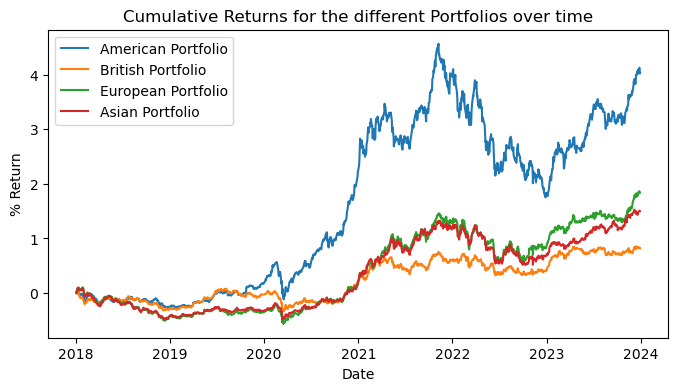

In [41]:
plt.figure(figsize=(8, 4))
for column in Cum_Rets:
    if column in Cum_Rets.columns:
        plt.plot(Cum_Rets.index, Cum_Rets[column], label=column)
    else:
        print(f"Column {column} not found in DataFrame.")

plt.title('Cumulative Returns for the different Portfolios over time')
plt.xlabel('Date')
plt.ylabel('% Return')
plt.legend()
plt.show()

In [42]:
# Save the Portfolio's data to a CSV file
Amdr.to_csv('American Portfolio.csv')
Brdr.to_csv('British Portfolio.csv')
Eudr.to_csv('European Portfolio.csv')
Asdr.to_csv('Asian Portfolio.csv')

In [43]:
# Create the correlation matrix
Amdr_corr = Amdr.corr()
Brdr_corr = Brdr.corr()
Eudr_corr = Eudr.corr()
Asdr_corr = Asdr.corr()

# Display the correlation matrix
Amdr_corr

,TSLA,JPM,^GSPC,BTC-USD,^VIX,Portfolio_Return,Cumulative_Return
TSLA,1.000000,0.264688,0.473784,0.172427,-0.335082,0.722873,-0.005772
JPM,0.264688,1.000000,0.730691,0.173576,-0.482155,0.582718,0.012513
^GSPC,0.473784,0.730691,1.000000,0.260406,-0.685393,0.710683,0.010062
BTC-USD,0.172427,0.173576,0.260406,1.000000,-0.216889,0.715918,0.016487
^VIX,-0.335082,-0.482155,-0.685393,-0.216889,1.000000,-0.508708,-0.023068
Portfolio_Return,0.722873,0.582718,0.710683,0.715918,-0.508708,1.000000,0.010893
Cumulative_Return,-0.005772,0.012513,0.010062,0.016487,-0.023068,0.010893,1.000000


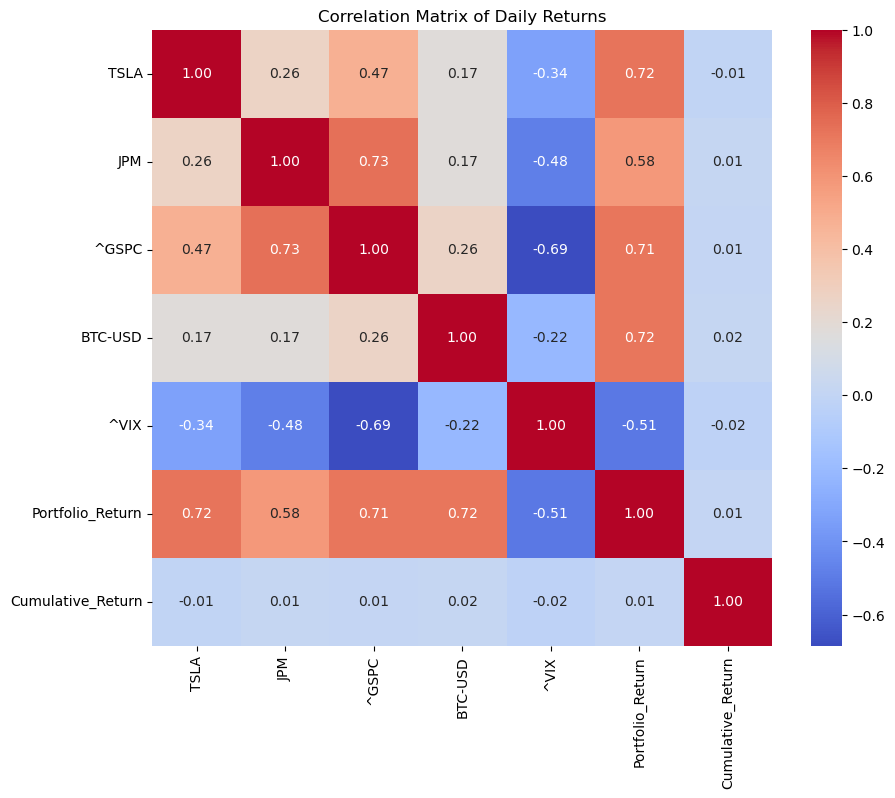

In [44]:
# If we want to visualize the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(Amdr_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [45]:
Brdr_corr

,BRBY.L,HSBA.L,^FTSE,BTC-USD,Portfolio_Return,Cumulative_Return
BRBY.L,1.000000,0.419112,0.635150,0.108019,0.622853,-0.001109
HSBA.L,0.419112,1.000000,0.673770,0.073701,0.562320,0.064204
^FTSE,0.635150,0.673770,1.000000,0.179268,0.676654,0.034726
BTC-USD,0.108019,0.073701,0.179268,1.000000,0.774181,0.015832
Portfolio_Return,0.622853,0.562320,0.676654,0.774181,1.000000,0.032985
Cumulative_Return,-0.001109,0.064204,0.034726,0.015832,0.032985,1.000000


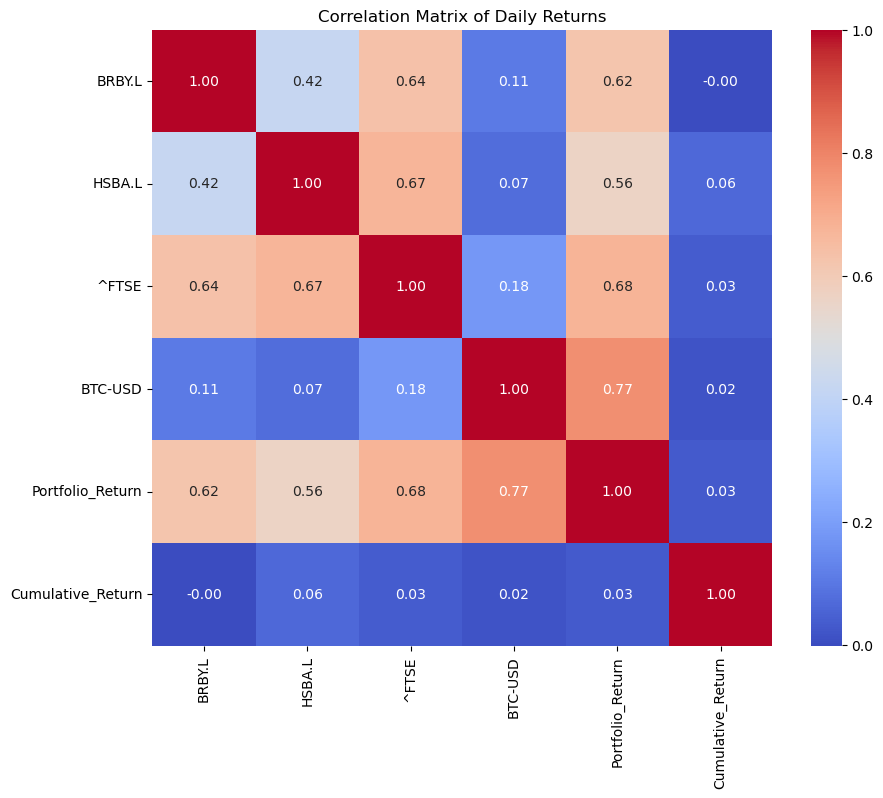

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(Brdr_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [47]:
Eudr_corr

,BMW.DE,UBS,^GDAXI,ETH-USD,Portfolio_Return,Cumulative_Return
BMW.DE,1.000000,0.548722,0.767611,0.177982,0.610071,0.032261
UBS,0.548722,1.000000,0.638842,0.242529,0.647437,0.050554
^GDAXI,0.767611,0.638842,1.000000,0.232776,0.655492,0.016964
ETH-USD,0.177982,0.242529,0.232776,1.000000,0.844193,0.015146
Portfolio_Return,0.610071,0.647437,0.655492,0.844193,1.000000,0.033400
Cumulative_Return,0.032261,0.050554,0.016964,0.015146,0.033400,1.000000


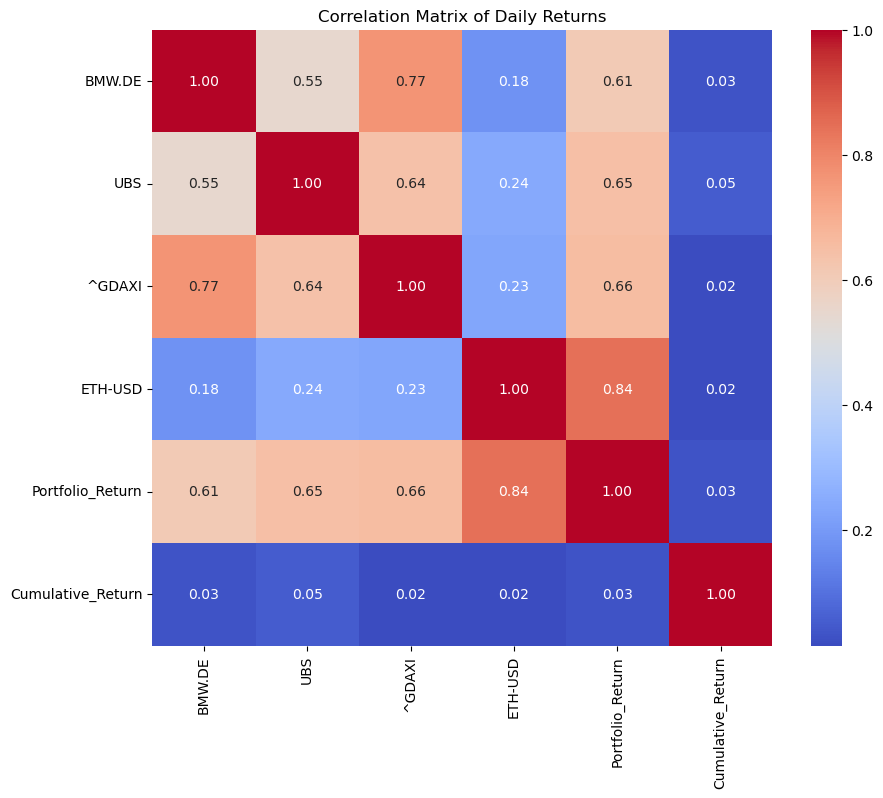

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(Eudr_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

In [49]:
Asdr_corr

,TM,MUFG,^N225,ETH-USD,Portfolio_Return,Cumulative_Return
TM,1.000000,0.562273,0.306842,0.189758,0.539532,0.024567
MUFG,0.562273,1.000000,0.230628,0.161926,0.522341,0.052090
^N225,0.306842,0.230628,1.000000,0.072538,0.342104,0.014148
ETH-USD,0.189758,0.161926,0.072538,1.000000,0.887456,0.016226
Portfolio_Return,0.539532,0.522341,0.342104,0.887456,1.000000,0.032848
Cumulative_Return,0.024567,0.052090,0.014148,0.016226,0.032848,1.000000


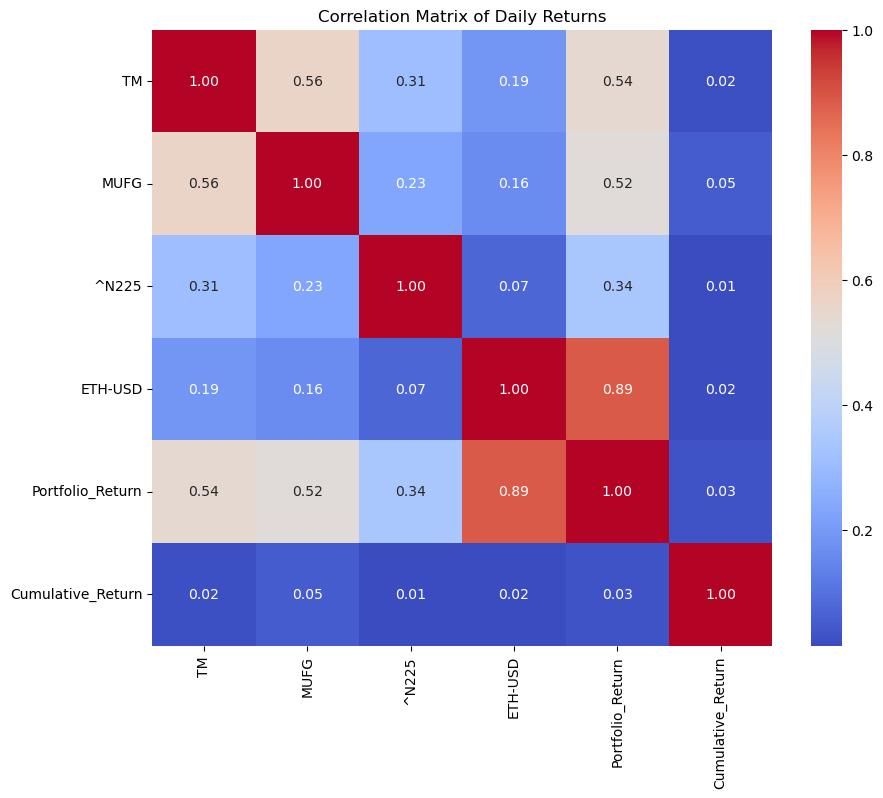

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(Asdr_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Daily Returns')
plt.show()

## Portfolio Returns, Benchmark approach

Since our portfolio is a weighted result of all of the asset's daily returns, we will proceed with another method, in which we will use the excess returns instead of the daily returns of the portfolios for the regressions.

In [116]:
# Correct way to specify columns to drop
columns_to_drop = ['Cumulative_Return', 'Portfolio_Return_nw', 'Benchmark Excess Returns']  # Use square brackets

# Drop the columns
Asdr = Asdr.drop(columns=columns_to_drop)

In [124]:
# show new data frame


In [ ]:
import statsmodels.api as sm

# Assuming 'market_excess_return' is the market excess return
# and 'portfolio_excess_return' is your portfolio excess return

X = sm.add_constant(market_excess_return)  # Add a constant term
y = portfolio_excess_return

model = sm.OLS(y, X).fit()
print(model.summary())

In [122]:
# Define market returns
Amdr_mkt_return = Amdr['^GSPC']
Brdr_mkt_return = Brdr['^FTSE']
Eudr_mkt_return = Eudr['^GDAXI']
Asdr_mkt_return = Asdr['^N225']

# Excess returns on assets, we don't include the index asset, since is now our new  benchmark for the excess market & assets return
# Correcting the column selection to use a list
Am_xsra = Amdr[['TSLA', 'JPM', 'BTC-USD']].subtract(Amdr_mkt_return, axis=0)
Br_xsra = Brdr[['BRBY.L', 'HSBA.L', 'BTC-USD']].subtract(Brdr_mkt_return, axis=0)
Eu_xsra = Eudr[['BMW.DE', 'UBS', 'ETH-USD']].subtract(Eudr_mkt_return, axis=0)
As_xsra = Asdr[['TM', 'MUFG', 'ETH-USD']].subtract(Asdr_mkt_return, axis=0)


Amxs_port_ret = Amdr['Portfolio_Return'] - Amdr_mkt_return
Brxs_port_ret = Brdr['Portfolio_Return'] - Brdr_mkt_return
Euxs_port_ret = Eudr['Portfolio_Return'] - Eudr_mkt_return
Asxs_port_ret = Asdr['Portfolio_Return'] - Asdr_mkt_return

# Adding portfolio return to the DataFrame
Amdr['Benchmark Excess Returns'] = Amxs_port_ret
Brdr['Benchmark Excess Returns'] = Brxs_port_ret
Eudr['Benchmark Excess Returns'] = Euxs_port_ret
Asdr['Benchmark Excess Returns'] = Asxs_port_ret 

## Linear Regression

We decided to use the proxy approach, in which the Stock Index composite will work as the Y variable (instead of the portfolio's daily returns) and the others stay constant in our regression

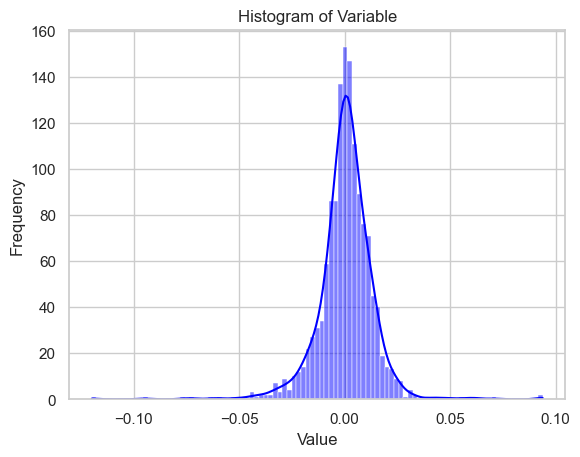

In [68]:
# Similar setup as before
sns.histplot(Amdr['^GSPC'], kde=True, color='blue')
plt.title('Histogram of Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [51]:
# Calculate the mean of each column
Amdr_mean = Amdr.mean()
Brdr_mean = Brdr.mean()
Eudr_mean = Eudr.mean()
Asdr_mean = Asdr.mean()


# Fill NaN values with the mean of each column
Amdr_filled = Amdr.fillna(Amdr_mean)
Brdr_filled = Brdr.fillna(Brdr_mean)
Eudr_filled = Eudr.fillna(Eudr_mean)
Asdr_filled = Asdr.fillna(Asdr_mean)

# Now 'data_filled' has no NaN values, and they are replaced with the mean of their respective columns


In [ ]:
# if we were to use the excess returns as a benchmark, we would use this
# Calculate the mean of each column

Am_xsra_mean =Am_xsra.mean()
Br_xsra_mean =Br_xsra.mean()
Eu_xsra_mean =Eu_xsra.mean()
As_xsra_mean =As_xsra.mean()
# Fill NaN values with the mean of each column

Am_xsra_filled =Am_xsra.fillna(Am_xsra_mean)
Br_xsra_filled =Br_xsra.fillna(Br_xsra_mean)
Eu_xsra_filled =Eu_xsra.fillna(Eu_xsra_mean)
As_xsra_filled =As_xsra.fillna(As_xsra_mean)

In [52]:
#Now we'll try to test our Regression model

from sklearn.linear_model import LinearRegression

X = Amdr_filled[['TSLA', 'JPM', 'BTC-USD']]  # Replace 'X' with your actual independent variable(s)
y = Amdr_filled['^GSPC']  # Replace 'y' with your actual dependent variable

# Create a linear regression model instance
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print out the coefficients
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficient: [0.09441133 0.42333305 0.029291  ]
Intercept: -7.898634859006661e-05


In [53]:
import statsmodels.api as sm

# Assuming Amdr is your DataFrame
# To select multiple columns, you should pass a list of column names, not a tuple
X = Amdr_filled[['TSLA', 'JPM', 'BTC-USD']]  # Note the double brackets
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = Amdr_filled['^GSPC']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# If you want to predict new values, assuming 'new_X' is a DataFrame with the same structure as 'X'
# predictions = model.predict(new_X)


                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     769.8
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.13e-293
Time:                        13:39:43   Log-Likelihood:                 4641.3
No. Observations:                1372   AIC:                            -9275.
Df Residuals:                    1368   BIC:                            -9254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.899e-05      0.000     -0.355      0.7

In [54]:
import statsmodels.api as sm

# Assuming Amdr is your DataFrame
# To select multiple columns, you should pass a list of column names, not a tuple
X = Brdr_filled[['BRBY.L', 'HSBA.L', 'BTC-USD']]  # Note the double brackets
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = Brdr_filled['^FTSE']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# If you want to predict new values, assuming 'new_X' is a DataFrame with the same structure as 'X'
# predictions = model.predict(new_X)


                            OLS Regression Results                            
Dep. Variable:                  ^FTSE   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     726.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.99e-282
Time:                        13:39:53   Log-Likelihood:                 4884.1
No. Observations:                1372   AIC:                            -9760.
Df Residuals:                    1368   BIC:                            -9739.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.327e-05      0.000     -0.501      0.6

In [55]:
import statsmodels.api as sm

# Assuming Amdr is your DataFrame
# To select multiple columns, you should pass a list of column names, not a tuple
X = Eudr_filled[['BMW.DE', 'UBS', 'ETH-USD']]  # Note the double brackets
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = Eudr_filled['^GDAXI']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# If you want to predict new values, assuming 'new_X' is a DataFrame with the same structure as 'X'
# predictions = model.predict(new_X)


                            OLS Regression Results                            
Dep. Variable:                 ^GDAXI   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     884.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.28e-319
Time:                        13:39:55   Log-Likelihood:                 4725.4
No. Observations:                1372   AIC:                            -9443.
Df Residuals:                    1368   BIC:                            -9422.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.560      0.5

In [56]:
import statsmodels.api as sm

# Assuming Amdr is your DataFrame
# To select multiple columns, you should pass a list of column names, not a tuple
X = Asdr_filled[['TM', 'MUFG', 'ETH-USD']]  # Note the double brackets
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = Asdr_filled['^N225']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# If you want to predict new values, assuming 'new_X' is a DataFrame with the same structure as 'X'
# predictions = model.predict(new_X)

                            OLS Regression Results                            
Dep. Variable:                  ^N225   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     50.21
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           8.75e-31
Time:                        13:39:57   Log-Likelihood:                 4139.7
No. Observations:                1372   AIC:                            -8271.
Df Residuals:                    1368   BIC:                            -8251.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.750      0.4

### Regression with Volatility Index

In [57]:
import statsmodels.api as sm

# Assuming Amdr is your DataFrame
# To select multiple columns, you should pass a list of column names, not a tuple
X = Amdr_filled[['TSLA', 'JPM', 'BTC-USD', '^VIX']]  # Note the double brackets
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = Amdr_filled['^GSPC']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())

# If you want to predict new values, assuming 'new_X' is a DataFrame with the same structure as 'X'
# predictions = model.predict(new_X)


                            OLS Regression Results                            
Dep. Variable:                  ^GSPC   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     893.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:40:23   Log-Likelihood:                 4844.3
No. Observations:                1372   AIC:                            -9679.
Df Residuals:                    1367   BIC:                            -9652.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.474      0.1

In [72]:
Amdr['Log_GSPC'] = np.log(Amdr['^GSPC'] + 1)  # Log-transform the column
Amdr['Log_VIX'] = np.log(Amdr['^VIX'] + 1)  # Log-transform the column
Amdr['Log_BTC-USD'] = np.log(Amdr['BTC-USD'] + 1)  # Log-transform the column


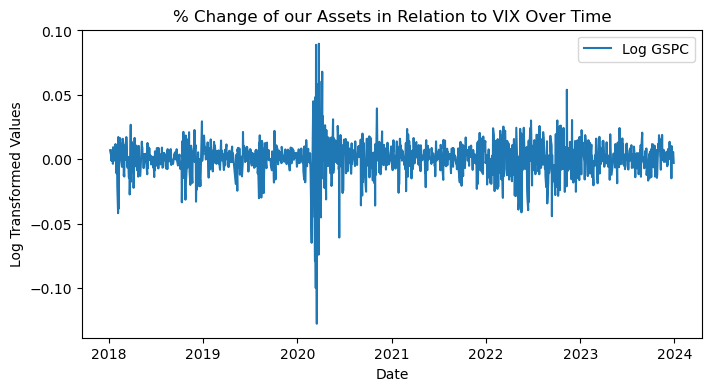

In [92]:
# Plotting log-transformed variables on a single plot
plt.figure(figsize=(8, 4))

# Overlay plots for each log-transformed variable
plt.plot(Amdr['Log_GSPC'], label='Log GSPC')

plt.title('% Change of our Assets in Relation to VIX Over Time')
plt.xlabel('Date')
plt.ylabel('Log Transformed Values')
plt.legend()

plt.show()

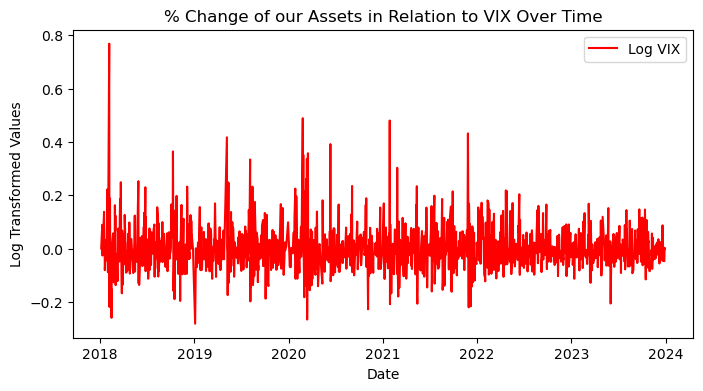

In [91]:
# Plotting log-transformed variables on a single plot
plt.figure(figsize=(8, 4))

# Overlay plots for each log-transformed variable
plt.plot(Amdr['Log_VIX'], label='Log VIX', color='red')

plt.title('% Change of our Assets in Relation to VIX Over Time')
plt.xlabel('Date')
plt.ylabel('Log Transformed Values')
plt.legend()

plt.show()

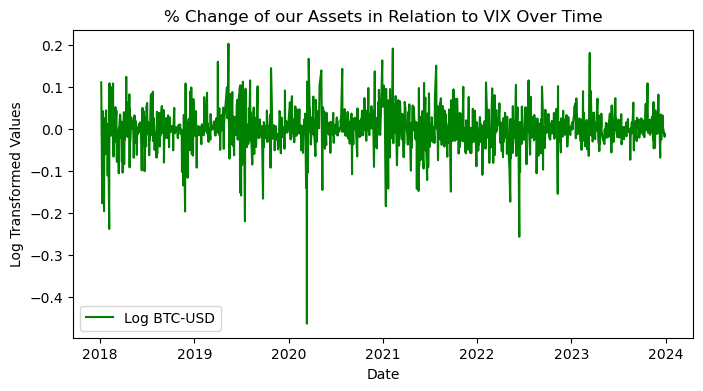

In [94]:
# Plotting log-transformed variables on a single plot
plt.figure(figsize=(8, 4))

# Overlay plots for each log-transformed variable
plt.plot(Amdr['Log_BTC-USD'], label='Log BTC-USD', color='green')

plt.title('% Change of our Assets in Relation to VIX Over Time')
plt.xlabel('Date')
plt.ylabel('Log Transformed Values')
plt.legend()

plt.show()